In [ ]:
#IMAGE PROCESSING FOR CNN

In [ ]:
import cv2
cv2.__version__

'4.7.0'

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
# 1. Reading an Image
# 2. Pixels value
# 3. Convolution
# 4. Basic Image Processing

In [ ]:
!wget https://media.wired.com/photos/5d09594a62bcb0c9752779d9/1:1/w_1500,h_1500,c_limit/Transpo_G70_TA-518126.jpg -O demo.jpg

--2023-06-18 07:40:02--  https://media.wired.com/photos/5d09594a62bcb0c9752779d9/1:1/w_1500,h_1500,c_limit/Transpo_G70_TA-518126.jpg
Resolving media.wired.com (media.wired.com)... 151.101.0.239, 151.101.64.239, 151.101.128.239, ...
Connecting to media.wired.com (media.wired.com)|151.101.0.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 408288 (399K) [image/jpeg]
Saving to: ‘demo.jpg’

demo.jpg            100%[===================>] 398.72K  --.-KB/s    in 0.04s   

2023-06-18 07:40:02 (9.12 MB/s) - ‘demo.jpg’ saved [408288/408288]



In [ ]:
img= cv2.imread('demo.jpg')
cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
img.shape

(1500, 1500, 3)

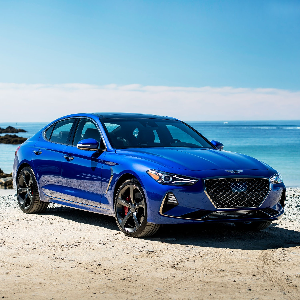

In [ ]:
# How to resize an image in Opencv?

i = cv2.resize(img,(300,300))
cv2_imshow(i)

In [ ]:
# Convolution

gray = i.mean(axis=2)

In [ ]:
i[0][0]

array([230, 199, 130], dtype=uint8)

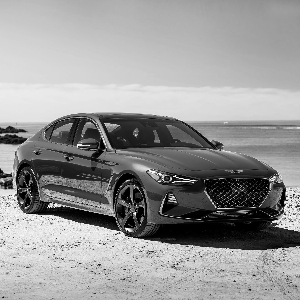

In [ ]:
cv2_imshow(gray)

In [ ]:
# Axis for vector : Axis 0
# Axis for Matrix : Axis 0(row) Axis(1) column
# Axis for 3D Array : Axis 0, Axis 1, Axis 2

In [ ]:
import numpy as np
ridge = np.ones((3,3),dtype='int')*(-1)
ridge[1][1] = 8
ridge

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

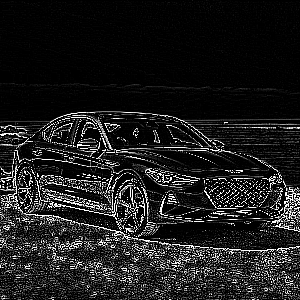

In [ ]:
e1 = cv2.filter2D(gray,-1,ridge) # Here -1 indicates the value of depth, it takes the depth as same as the src image
cv2_imshow(e1) # the output image will have the same depth as the source

In [ ]:
blur = np.ones((3,3),dtype='int')*(1/9)
e1 = cv2.filter2D(img,-1,blur)
cv2_imshow(e1)

Output hidden; open in https://colab.research.google.com to view.

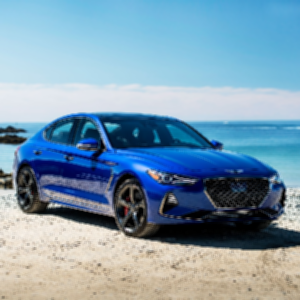

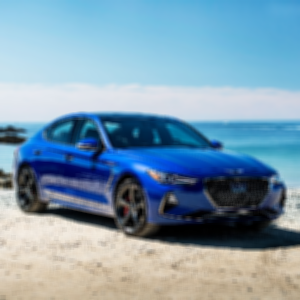

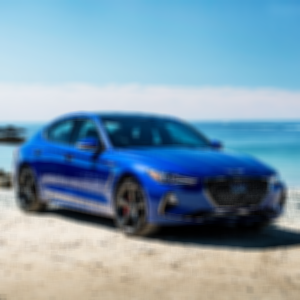

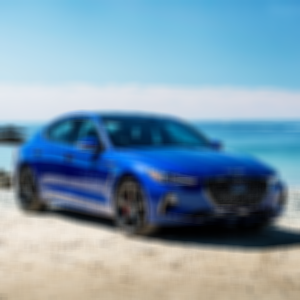

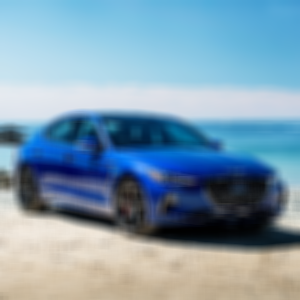

In [ ]:
i = cv2.resize(img,(300,300))
for j in range(3,12,2):
  op = cv2.blur(i,(j,j))
  cv2_imshow(op)

In [ ]:
#CNN-

In [ ]:
import tensorflow as tf
import os

In [ ]:
url= 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

In [ ]:
%pwd

'/content'

In [ ]:
%cd ~/.keras

/root/.keras


In [ ]:
%pwd

'/root/.keras'

In [ ]:
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip',origin=url,extract=True)

68606236/68606236 [==============================] - 0s 0us/step


In [ ]:
%ls

In [ ]:
%cd datasets

[Errno 2] No such file or directory: 'datasets'
/root/.keras


In [ ]:
%ls

datasets/  keras.json


In [ ]:
%cd cats_and_dogs_filtered

[Errno 2] No such file or directory: 'cats_and_dogs_filtered'
/root/.keras


In [ ]:
%ls

datasets/  keras.json


In [ ]:
%cd /content

/content


In [ ]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-06-18 14:34:51--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.31.128, 74.125.141.128, 108.177.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   171MB/s    in 0.4s    

2023-06-18 14:34:51 (171 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
!unzip /content/cats_and_dogs_filtered.zip

Archive:  /content/cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/

In [ ]:
%cd /content/cats_and_dogs_filtered/train/cats

/content/cats_and_dogs_filtered/train/cats


In [ ]:
%pwd

'/content/cats_and_dogs_filtered/train/cats'

In [ ]:
print(len(os.listdir('/content/cats_and_dogs_filtered/train/cats')))
print(len(os.listdir('/content/cats_and_dogs_filtered/train/dogs')))
print(len(os.listdir('/content/cats_and_dogs_filtered/validation/cats')))
print(len(os.listdir('/content/cats_and_dogs_filtered/validation/dogs')))

1000
1000
500
500


In [ ]:
dir_dataset = '/content/cats_and_dogs_filtered'
train_dir = os.path.join(dir_dataset,'train')
val_dir = os.path.join(dir_dataset,'validation')

In [ ]:
train_cat_dir = os.path.join(train_dir,'cats')
train_dog_dir = os.path.join(train_dir,'dogs')
val_cat_dir = os.path.join(val_dir,'cats')
val_dog_dir = os.path.join(val_dir,'dogs')
print(train_cat_dir,train_dog_dir,val_cat_dir,val_dog_dir)

/content/cats_and_dogs_filtered/train/cats /content/cats_and_dogs_filtered/train/dogs /content/cats_and_dogs_filtered/validation/cats /content/cats_and_dogs_filtered/validation/dogs


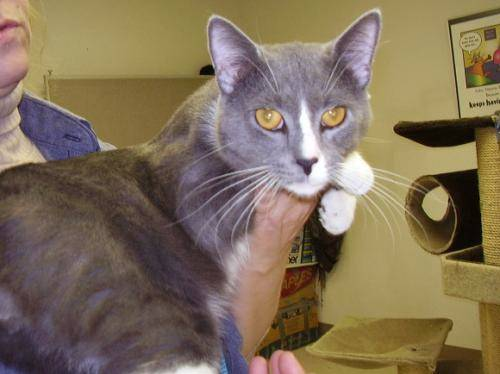

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
path = os.listdir(train_cat_dir)[12]
img = cv2.imread(path)
cv2_imshow(img)

In [ ]:
train_img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
val_img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [ ]:
train_data_gen = train_img_gen.flow_from_directory(train_dir,target_size=(150,150),class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
# model.fit(train_data_gen,validation_data=val_data_gen,epochs=1000)

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(train_dir,image_size=(150,150))

Found 2000 files belonging to 2 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']


In [ ]:
#CNN CIFAR 10

In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
len(x_train)

50000

In [ ]:
len(x_test)

10000

In [ ]:
labels = ['airplanes','cars','birds','cats','deer','dogs','frogs','horses','ships','trucks']

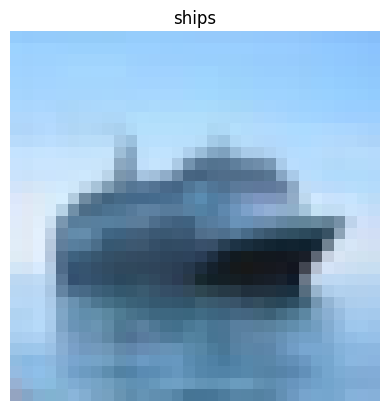

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
i = np.random.randint(0,50001)
plt.imshow(x_train[i])
plt.title(labels[y_train[i][0]])
plt. axis('off')
plt.show()

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
import pandas as pd
pd.Series(y_train.flatten()).value_counts()

6    5000
9    5000
4    5000
1    5000
2    5000
7    5000
8    5000
3    5000
5    5000
0    5000
dtype: int64

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
32*32*3

3072

In [ ]:
# ANN model

ann = tf.keras.Sequential()
ann.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape))
ann.add(tf.keras.layers.Dense(2048,activation='relu'))
ann.add(tf.keras.layers.Dense(1024,activation='relu'))
ann.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 2048)              6293504   
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 10)                10250     
                                                                 
Total params: 8,401,930
Trainable params: 8,401,930
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ann.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])

In [ ]:
y_train.flatten()

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
history = ann.fit(x_train,y_train.flatten(),epochs=20,validation_split=0.1)

In [ ]:
pd.Series(history.history['loss']).plot()
pd.Series(history.history['val_loss']).plot()